In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier # model
from xgboost import plot_importance as xgb_plot_importance# 중요변수 시각화
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from keras.models import load_model


from sklearn.metrics import roc_curve,confusion_matrix, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from lightgbm import plot_importance
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.over_sampling import SMOTE
%matplotlib inline

from sklearn.utils.class_weight import compute_class_weight

import warnings
warnings.filterwarnings(action='ignore')

In [26]:
df_onehot = pd.read_csv('onehot_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_label = pd.read_csv('label_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_onehot

df_dropna = pd.read_csv('onehotdropna_encoding_data.csv').drop('Unnamed: 0',axis=1)
df_mo1 = df_onehot.drop(['age','pdays','previous'],axis=1)
df_mo2 = df_label.drop(['age','pdays','previous'],axis=1)
df_onehot.columns

Index(['age', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'divorced', 'married', 'single',
       'marital_unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y',
       'high.school', 'university.degree', 'professional.course',
       'edu_unknown', 'default_no', 'default_yes', 'default_unknown',
       'house_no', 'house_yes', 'house_unknown', 'loan_no', 'loan_yes',
       'loan_unknown', 'pdays', 'previous', 'pout_no', 'pout_yes',
       'pout_unknown', 'y'],
      dtype='object')

In [31]:
def score(a,b,c):
    confusion = np.round(confusion_matrix(a,b),3)
    accuracy = np.round(accuracy_score(a,b),3)
    precision = np.round(precision_score(a,b),3)
    recall = np.round(recall_score(a,b),3)
    f1 = np.round(f1_score(a,b),3)
    
    roc_auc = np.round(roc_auc_score(a,b),3)
    
#     print(f'Confusion Matrix of {c}')
#     display(pd.DataFrame(confusion))
#     sns.heatmap(confusion, annot=True, fmt='d')
#     plt.show()
    
    return confusion,pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[c])

def classification(X,y,method = None):
    
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
    
    undersample = RandomUnderSampler(sampling_strategy='majority')
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    

    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    
    smote_sample = SMOTE(sampling_strategy=0.2) 
    X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    
    if method == 'under':
        X_train, y_train = X_under, y_under
    elif method == 'over':
        X_train, y_train = X_over, y_over
    elif method == 'smote':
        X_train, y_train = X_sm, y_sm

    model = LGBMClassifier(random_state=0)
    model.fit(X_train,y_train)
    ligt_gbm = model.predict(X_test)
    ligt_gbm_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_opt = pd.DataFrame(ligt_gbm_proba).loc[:,1]>= optimal_threshold
    
    
    model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=0)
    model.fit(X_train,y_train)
    ligt_gbm_2 = model.predict(X_test)
    ligt_gbm_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_2_opt = pd.DataFrame(ligt_gbm_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model= XGBClassifier(random_state=0)
    model.fit(X_train, y_train)
    xgb_1 = model.predict(X_test)
    xgb_1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_1_opt = pd.DataFrame(xgb_1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = XGBClassifier(n_estimators=400, learning_rate = 0.05, max_depth = 5,random_state=0)
    evals = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = "logloss", eval_set = evals, verbose = 0)
    xgb_2 = model.predict(X_test)
    xgb_2_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(xgb_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     xgb_2_opt = pd.DataFrame(xgb_2_proba).loc[:,1]>= optimal_threshold
    
    
    
    model=RandomForestClassifier(random_state=0)
    model.fit(X_train,y_train)
    rf1=model.predict(X_test)
    rf1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(rf1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     rf1_opt = pd.DataFrame(rf1_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model=DecisionTreeClassifier(random_state=0)
    model.fit(X_train,y_train)
    df1=model.predict(X_test)
    df1_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(df1_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     df1_opt = pd.DataFrame(df1_proba).loc[:,1]>= optimal_threshold
    
    
    
    knc_model = KNeighborsClassifier()
    knc_model.fit(X_train,y_train) #학습
    knn = knc_model.predict(X_test)
    knn_proba = model.predict_proba(X_test)
    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(knn_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     knn_opt = pd.DataFrame(knn_proba).loc[:,1]>= optimal_threshold
    
    
    
    
    model = Sequential()
    model.add(Dense(32,input_dim = len(X_train.columns),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer = 'adam', metrics=['accuracy',tf.keras.metrics.Precision(name='precision')
                          ,tf.keras.metrics.Recall(name='recall')
                          ,tf.keras.metrics.FalsePositives(name='false_positives')
                          ,tf.keras.metrics.FalseNegatives(name='false_negatives')
                          ,tfa.metrics.F1Score(name='f1_score',num_classes=1)])
    
    history = model.fit(X_train,y_train,epochs=20,batch_size=100,verbose=0)
    dnn = model.predict(X_test)
    dnn = pd.DataFrame(data=dnn).astype('float64')
    dnn[0]=dnn[0].apply(lambda x: 1 if x >= 0.5 else 0)
    
    
    confusion1,score1 = score(y_test,ligt_gbm,'ligt_gbm_1')
    confusion2,score2  = score(y_test,ligt_gbm_2,'ligt_gbm_2')
    confusion3,score3 = score(y_test,xgb_1,'xgb_1')
    confusion4,score4  = score(y_test,xgb_2,'xgb_2')
    confusion5,score5  = score(y_test,rf1,'rf1')
    confusion6,score6  = score(y_test,df1,'df1')
    confusion7,score7  = score(y_test,knn,'knn')
    confusion8,score8  = score(y_test,dnn[0],'dnn')
    
    


        
    df = pd.concat([score1,score2,score3,score4,score5,score6,score7,score8],axis=1)
    return np.round(df,3)

# 모델의 예측 성능 비교
## 원데이터 학습(샘플링 방식에 따라 구분)

None sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.895,0.897,0.894,0.897,0.876,0.866,0.885,0.897
precision,0.607,0.644,0.595,0.645,0.400,0.333,0.476,0.616
recall,0.196,0.193,0.178,0.196,0.214,0.193,0.191,0.215
f1,0.296,0.297,0.274,0.300,0.279,0.244,0.272,0.318
roc_auc,0.590,0.590,0.581,0.591,0.587,0.572,0.582,0.599
score,0.717,0.752,0.695,0.755,0.520,0.441,0.583,0.736


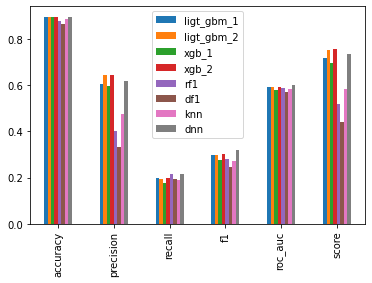

under sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.741,0.764,0.703,0.800,0.616,0.622,0.768,0.749
precision,0.219,0.235,0.197,0.270,0.165,0.154,0.222,0.229
recall,0.508,0.489,0.533,0.456,0.595,0.525,0.426,0.519
f1,0.306,0.318,0.287,0.339,0.258,0.238,0.292,0.318
roc_auc,0.639,0.644,0.629,0.650,0.607,0.579,0.619,0.649
score,0.503,0.509,0.495,0.525,0.498,0.448,0.461,0.520


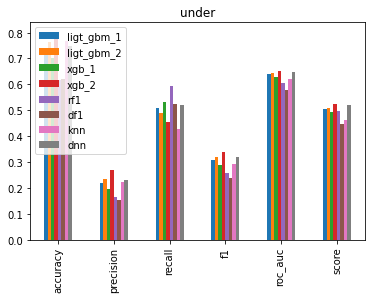

over sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.789,0.790,0.754,0.769,0.736,0.732,0.832,0.731
precision,0.257,0.257,0.218,0.237,0.183,0.166,0.279,0.214
recall,0.462,0.458,0.459,0.476,0.392,0.345,0.315,0.521
f1,0.330,0.329,0.296,0.316,0.250,0.224,0.296,0.304
roc_auc,0.646,0.645,0.625,0.641,0.585,0.563,0.606,0.639
score,0.516,0.513,0.475,0.504,0.403,0.359,0.455,0.506


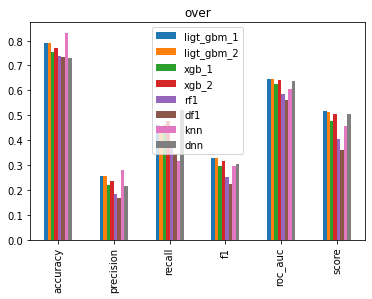

smote sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.897,0.897,0.895,0.897,0.874,0.865,0.868,0.897
precision,0.622,0.623,0.614,0.633,0.395,0.340,0.375,0.621
recall,0.204,0.211,0.186,0.196,0.226,0.212,0.260,0.218
f1,0.307,0.315,0.286,0.299,0.288,0.262,0.307,0.323
roc_auc,0.594,0.597,0.586,0.591,0.591,0.580,0.603,0.601
score,0.736,0.741,0.718,0.743,0.522,0.459,0.521,0.743


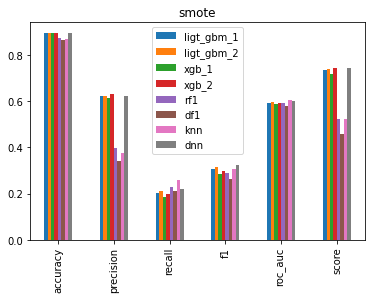

In [32]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

None sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.881,0.882,0.879,0.883,0.862,0.860,0.873,0.882
precision,0.637,0.645,0.594,0.646,0.422,0.398,0.511,0.629
recall,0.176,0.182,0.176,0.188,0.196,0.177,0.185,0.201
f1,0.276,0.284,0.271,0.292,0.268,0.245,0.272,0.305
roc_auc,0.581,0.584,0.579,0.587,0.578,0.569,0.579,0.592
score,0.736,0.747,0.693,0.751,0.532,0.497,0.615,0.742


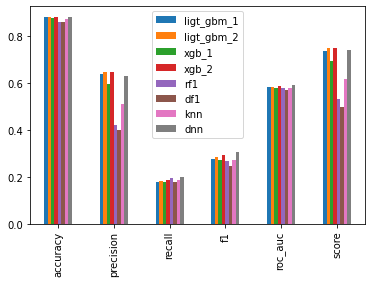

under sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.742,0.777,0.722,0.813,0.617,0.646,0.767,0.778
precision,0.240,0.273,0.225,0.318,0.177,0.177,0.248,0.272
recall,0.466,0.442,0.477,0.398,0.547,0.482,0.402,0.438
f1,0.317,0.337,0.306,0.353,0.268,0.259,0.307,0.336
roc_auc,0.624,0.634,0.618,0.636,0.587,0.576,0.611,0.633
score,0.501,0.521,0.492,0.541,0.483,0.447,0.473,0.517


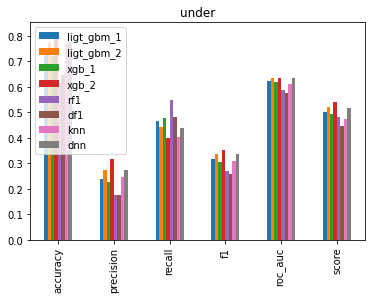

over sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.788,0.806,0.770,0.786,0.700,0.697,0.838,0.771
precision,0.283,0.305,0.257,0.276,0.192,0.181,0.339,0.270
recall,0.424,0.402,0.420,0.409,0.418,0.384,0.280,0.465
f1,0.339,0.347,0.319,0.329,0.263,0.246,0.307,0.342
roc_auc,0.633,0.634,0.621,0.626,0.580,0.564,0.600,0.640
score,0.520,0.530,0.492,0.505,0.426,0.396,0.496,0.530


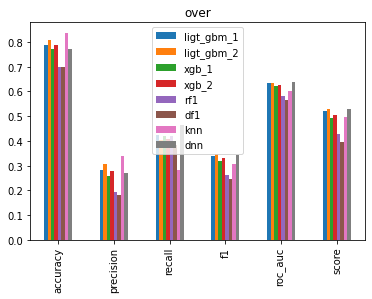

smote sampling


,ligt_gbm_1,ligt_gbm_2,xgb_1,xgb_2,rf1,df1,knn,dnn
accuracy,0.881,0.882,0.879,0.883,0.860,0.858,0.867,0.883
precision,0.621,0.628,0.590,0.633,0.408,0.390,0.457,0.637
recall,0.193,0.201,0.185,0.205,0.210,0.188,0.219,0.202
f1,0.294,0.305,0.282,0.310,0.277,0.254,0.296,0.307
roc_auc,0.588,0.592,0.583,0.594,0.582,0.573,0.590,0.593
score,0.729,0.741,0.694,0.748,0.526,0.495,0.580,0.750


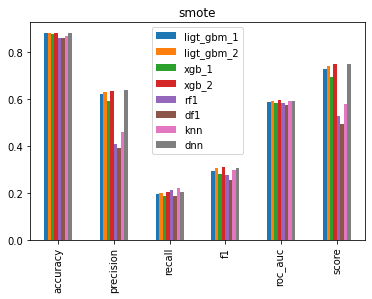

In [33]:
for i in [None,'under','over','smote']:
    print(i,'sampling')
    df = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],i)
    display(df)
    df.plot.bar()
    plt.title(i)
    plt.show()

# 최적 모델 탐색
## 원데이터 학습(샘플링 방식에 따라 구분)

In [15]:
df_onehot_none = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'])
df_onehot_under = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'under')
df_onehot_over = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'over')
df_onehot_smote = classification(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],'smote')

In [16]:
def best_score(df,i):
    for j in i:
        dt = df.loc[j,:]
        a = pd.DataFrame(dt[dt==max(dt)])
        print(f'best of {j}:',dt[dt==max(dt)])
        print('')

        
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: ligt_gbm_2    0.897
xgb_2         0.897
dnn           0.897
Name: accuracy, dtype: float64

best of precision: xgb_2    0.645
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: dnn    0.312
Name: f1, dtype: float64

best of roc_auc: dnn    0.596
Name: roc_auc, dtype: float64

best of score: xgb_2    0.755
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.813
Name: accuracy, dtype: float64

best of precision: dnn    0.276
Name: precision, dtype: float64

best of recall: rf1    0.6
Name: recall, dtype: float64

best of f1: xgb_2    0.332
Name: f1, dtype: float64

best of roc_auc: ligt_gbm_2    0.648
Name: roc_auc, dtype: float64

best of score: ligt_gbm_2    0.516
xgb_2         0.516
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.279
Name: precision, dtype: f

## unknown값을 결측치 처리를한 데이터 학습(샘플링 방식에 따라 구분)

In [17]:
df_dropna_none = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'])
df_dropna_under = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'under')
df_dropna_over = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'over')
df_dropna_smote = classification(df_dropna.loc[:,:'pout_unknown'],df_dropna['y'],'smote')

In [18]:
print('샘플링: 없음, 데이터: 원데이터 모델 성능')
best_score(df_onehot_none,df_onehot_none.index)

print('샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_under,df_onehot_under.index)

print('샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능')
best_score(df_onehot_over,df_onehot_over.index)

print('샘플링: 오버 smote, 데이터: 원데이터 모델 성능')
best_score(df_onehot_smote,df_onehot_smote.index)

샘플링: 없음, 데이터: 원데이터 모델 성능
best of accuracy: ligt_gbm_2    0.897
xgb_2         0.897
dnn           0.897
Name: accuracy, dtype: float64

best of precision: xgb_2    0.645
Name: precision, dtype: float64

best of recall: rf1    0.214
Name: recall, dtype: float64

best of f1: dnn    0.312
Name: f1, dtype: float64

best of roc_auc: dnn    0.596
Name: roc_auc, dtype: float64

best of score: xgb_2    0.755
Name: score, dtype: float64

샘플링: 언더 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: dnn    0.813
Name: accuracy, dtype: float64

best of precision: dnn    0.276
Name: precision, dtype: float64

best of recall: rf1    0.6
Name: recall, dtype: float64

best of f1: xgb_2    0.332
Name: f1, dtype: float64

best of roc_auc: ligt_gbm_2    0.648
Name: roc_auc, dtype: float64

best of score: ligt_gbm_2    0.516
xgb_2         0.516
Name: score, dtype: float64

샘플링: 오버 샘플링, 데이터: 원데이터 모델 성능
best of accuracy: knn    0.832
Name: accuracy, dtype: float64

best of precision: knn    0.279
Name: precision, dtype: f

model = 

Confusion Matrix


,0,1
0,10807,161
1,1107,282


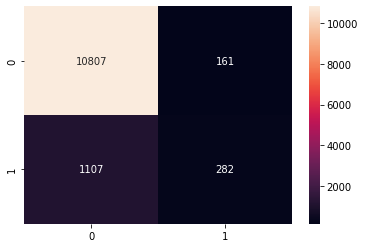

,0
accuracy,0.89700
precision,0.63700
recall,0.20300
f1,0.30800
roc_auc,0.59400
score,0.75068


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:,:'pout_unknown'],df_onehot['y'],test_size=0.3,random_state=42)
    

    
smote_sample = SMOTE(sampling_strategy=0.2) 
X_sm, y_sm = smote_sample.fit_resample(X_train, y_train)
    

X_train, y_train = X_sm, y_sm

model = LGBMClassifier(random_state=0)
model.fit(X_train,y_train)
ligt_gbm = model.predict(X_test)

    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_opt = pd.DataFrame(ligt_gbm_proba).loc[:,1]>= optimal_threshold
    
    
model = LGBMClassifier(learning_rate=0.05,max_depth=20,random_state=0)
model.fit(X_train,y_train)
ligt_gbm_2 = model.predict(X_test)

    
#     fpr, tpr, thresholds = roc_curve(y_test,pd.DataFrame(ligt_gbm_2_proba).loc[:,1])
#     optimal_idx = np.argmax(tpr - fpr)
#     optimal_threshold = thresholds[optimal_idx]
#     light_gbm_2_opt = pd.DataFrame(ligt_gbm_2_proba).loc[:,1]>= optimal_threshold
    
    

a= y_test
b = ligt_gbm
    
confusion = np.round(confusion_matrix(a,b),3)
accuracy = np.round(accuracy_score(a,b),3)
precision = np.round(precision_score(a,b),3)
recall = np.round(recall_score(a,b),3)
f1 = np.round(f1_score(a,b),3)

roc_auc = np.round(roc_auc_score(a,b),3)

print('Confusion Matrix')
display(pd.DataFrame(confusion))
sns.heatmap(confusion, annot=True, fmt='d')
plt.show()

pd.DataFrame(index=['accuracy','precision','recall','f1','roc_auc','score'],data = [[accuracy],[precision],[recall],[f1],[roc_auc],[precision+recall*0.56]],columns=[0])
